<a href="https://colab.research.google.com/github/Mulababs/3mtt-Deeptech/blob/main/Stock_Recommendation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Initial Setup and Data Loading
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Install fuzzywuzzy if not already installed
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from IPython.display import display # Import display function

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
# Upload the necessary files
uploaded = files.upload()

# Print upload confirmations (optional)
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Load ngx_cleaned_final.csv into pandas
try:
    df_ngx = pd.read_csv('ngx_cleaned_final.csv', encoding='ascii')
    print("\nNGX DataFrame Info:")
    print(df_ngx.info())
    # Convert date columns to datetime
    df_ngx['Open date'] = pd.to_datetime(df_ngx['Open date'], format='%d/%m/%Y', errors='coerce')
    df_ngx['Close date'] = pd.to_datetime(df_ngx['Close date'], format='%d/%m/%Y', errors='coerce')
    # Clean up column names
    df_ngx.columns = df_ngx.columns.str.strip()
except FileNotFoundError:
    print("Error: ngx_cleaned_final.csv not found. Please upload the file.")
except Exception as e:
    print(f"Error loading ngx_cleaned_final.csv: {e}")
    df_ngx = None # Set to None if loading fails

Saving ngx_cleaned_final.csv to ngx_cleaned_final (1).csv
User uploaded file "ngx_cleaned_final (1).csv" with length 96880 bytes

NGX DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open date              689 non-null    object 
 1   Close date             689 non-null    object 
 2   Stock                  689 non-null    object 
 3   Opening Price(MONDAY)  689 non-null    float64
 4   Closing Price(FRIDAY)  689 non-null    float64
 5   Actual Weekly Return   689 non-null    float64
 6   High_Price(MONDAY)     689 non-null    float64
 7   High_Price(FRIDAY)     689 non-null    float64
 8   High Price             689 non-null    float64
 9   Low_Price(MONDAY)      689 non-null    float64
 10  Low_Price(FRIDAY)      689 non-null    float64
 11  Low Price              689 non-null    float64
 12  Total Volume

In [5]:
# Upload the necessary files
uploaded = files.upload()

# Print upload confirmations (optional)
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Load Meristem_Rec_cleaned_final.csv into pandas
try:
    rec_df = pd.read_csv('Meristem_Rec_cleaned_final.csv', encoding='ascii')
    print("\nMeristem DataFrame Info:")
    print(rec_df.info())
    # Convert date columns to datetime
    rec_df['Open date'] = pd.to_datetime(rec_df['Open date'], format='%d/%m/%Y', errors='coerce')
    rec_df['Close date'] = pd.to_datetime(rec_df['Close date'], format='%d/%m/%Y', errors='coerce')
    # Clean up column names
    rec_df.columns = rec_df.columns.str.strip()
except FileNotFoundError:
    print("Error: Meristem_Rec_cleaned_final.csv not found. Please upload the file.")
except Exception as e:
    print(f"Error loading Meristem_Rec_cleaned_final.csv: {e}")
    rec_df = None # Set to None if loading fail

Saving Meristem_Rec_cleaned_final.csv to Meristem_Rec_cleaned_final.csv
User uploaded file "Meristem_Rec_cleaned_final.csv" with length 19738 bytes

Meristem DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Open date       552 non-null    object
 1   Close date      552 non-null    object
 2   Stock           552 non-null    object
 3   Recommendation  552 non-null    object
dtypes: object(4)
memory usage: 17.4+ KB
None


In [6]:
# --- Data Validation and Initial Exploration ---
if rec_df is not None:
    print("\nRecommendation Data Head:")
    print(rec_df.head())
    print("\nUnique Recommendation Levels:")
    print(rec_df['Recommendation'].unique())

if df_ngx is not None:
    print("\nNGX Data Head:")
    print(df_ngx.head())


Recommendation Data Head:
   Open date Close date         Stock Recommendation
0 2024-04-22 2024-04-26    ACCESSCORP            BUY
1 2024-04-22 2024-04-26           ETI           SELL
2 2024-04-22 2024-04-26          FCMB            BUY
3 2024-04-22 2024-04-26  FIDELITYBANK            BUY
4 2024-04-22 2024-04-26          FBNH           SELL

Unique Recommendation Levels:
['BUY' 'SELL' 'HOLD' 'Not covered']

NGX Data Head:
   Open date Close date         Stock  Opening Price(MONDAY)  \
0 2024-04-01 2024-04-05    ACCESSCORP                  22.00   
1 2024-04-01 2024-04-05           ETI                  32.00   
2 2024-04-01 2024-04-05          FCMB                   8.95   
3 2024-04-01 2024-04-05  FIDELITYBANK                  20.25   
4 2024-04-01 2024-04-05          GTCO                  67.80   

   Closing Price(FRIDAY)  Actual Weekly Return  High_Price(MONDAY)  \
0                   22.6              0.027273               23.00   
1                   26.0             -0.187500 

In [7]:
# --- Basic Recommendation Analysis ---
if rec_df is not None:
    # Count the number of each recommendation type
    recommendation_counts = rec_df['Recommendation'].value_counts()
    print("\nRecommendation Counts:")
    print(recommendation_counts)


Recommendation Counts:
Recommendation
BUY            405
HOLD            99
Not covered     26
SELL            22
Name: count, dtype: int64



Recommendation Counts:
Recommendation
BUY            405
HOLD            99
Not covered     26
SELL            22
Name: count, dtype: int64


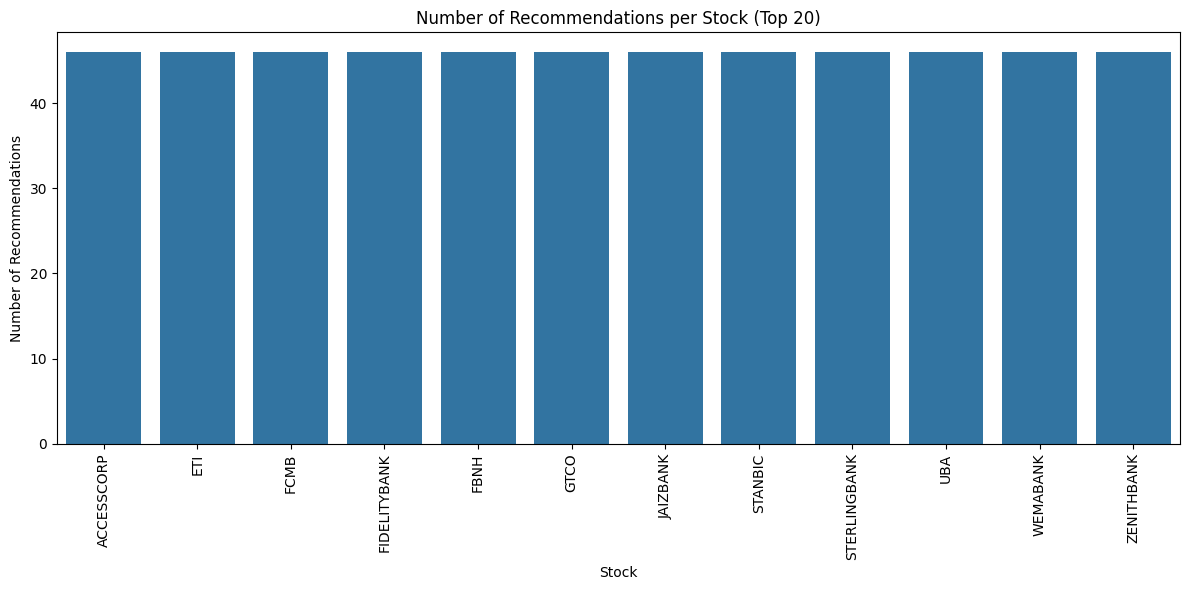

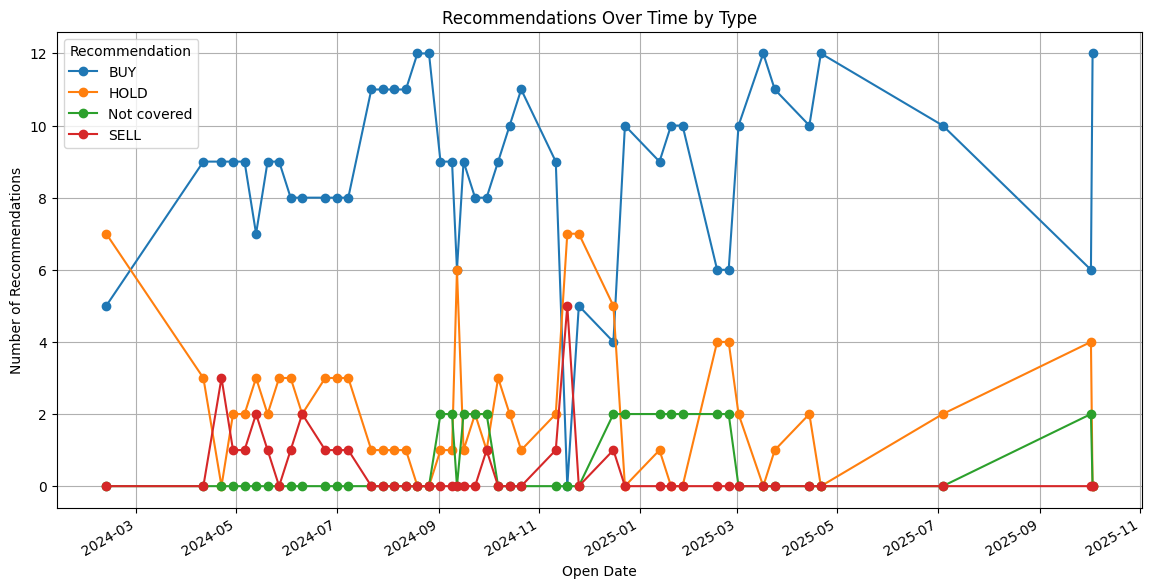

In [9]:
# --- Basic Recommendation Analysis ---
if rec_df is not None:
    # Count the number of each recommendation type
    recommendation_counts = rec_df['Recommendation'].value_counts()
    print("\nRecommendation Counts:")
    print(recommendation_counts)

    # Count recommendations per stock
    recommendations_per_stock = rec_df['Stock'].value_counts()

    # Plot the number of recommendations per stock (for top N stocks for clarity)
    plt.figure(figsize=(12, 6))
    top_n_stocks = recommendations_per_stock.head(20) # Plot top 20 stocks
    sns.barplot(x=top_n_stocks.index, y=top_n_stocks.values)
    plt.title('Number of Recommendations per Stock (Top 20)')
    plt.xlabel('Stock')
    plt.ylabel('Number of Recommendations')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Group by open date and recommendation type
    recommendations_over_time = rec_df.groupby(['Open date', 'Recommendation']).size().unstack(fill_value=0)

    # Plot the recommendations over time
    plt.figure(figsize=(14, 7))
    recommendations_over_time.plot(ax=plt.gca(), marker='o', linestyle='-')
    plt.title('Recommendations Over Time by Type')
    plt.xlabel('Open Date')
    plt.ylabel('Number of Recommendations')
    plt.legend(title='Recommendation')
    plt.grid(True)
    plt.show()

In [14]:
# --- Performance Evaluation Setup ---
if rec_df is not None and df_ngx is not None:
    # Filter NGX data for stocks present in recommendations
    stocks_in_rec = rec_df['Stock'].unique()
    ngx_filtered = df_ngx[df_ngx['Stock'].isin(stocks_in_rec)].copy()

    # Define a function to evaluate stock price change over the recommendation period
    def evaluate_recommendation(row):
        stock = row['Stock']
        start_date = row['Open date']
        end_date = row['Close date']

        # Filter NGX data for the specific stock and date range
        # Using >= start_date and <= end_date for the entire period
        stock_data = ngx_filtered[(ngx_filtered['Stock'] == stock) &
                                  (ngx_filtered['Open date'] >= start_date) &
                                  (ngx_filtered['Close date'] <= end_date)].copy()

        if stock_data.empty:
            return np.nan

        # Calculate price change from opening on the start date to closing on the end date
        # Ensure the first 'Opening Price' and last 'Closing Price' within the period are used
        first_entry = stock_data.sort_values(by='Open date').iloc[0]
        last_entry = stock_data.sort_values(by='Open date').iloc[-1]

        start_price = first_entry['Opening Price(MONDAY)']
        end_price = last_entry['Closing Price(FRIDAY)']

        if pd.isna(start_price) or pd.isna(end_price) or start_price == 0:
             return np.nan # Avoid division by zero or missing prices

        price_change = (end_price - start_price) / start_price
        return price_change

In [17]:
    # Apply the function to the recommendation dataset
    rec_df['price_change'] = rec_df.apply(evaluate_recommendation, axis=1)

    # Define criteria for correct recommendations: for 'BUY', price should increase; for 'SELL', price should decrease
    # Consider 'HOLD' as correct if price change is within a small threshold (e.g., +/- 5%)
    hold_threshold = 0.05
    rec_df['correct'] = rec_df.apply(
        lambda row: (row['Recommendation'] == 'BUY' and row['price_change'] > 0) or
                    (row['Recommendation'] == 'SELL' and row['price_change'] < 0) or
                    (row['Recommendation'] == 'HOLD' and abs(row['price_change']) <= hold_threshold),
        axis=1
    )

    # Show the first few rows with the new evaluation
    print("\nRecommendations with Price Change and Correctness:")
    display(rec_df.head())

    # --- Overall Accuracy and Performance by Recommendation Type ---
    # Calculate overall accuracy (excluding NaNs in price_change)
    accuracy = rec_df['correct'].mean()
    print(f"\nOverall Recommendation Accuracy (excluding NaN price changes): {accuracy:.3f}")

    # Show a summary of correct vs incorrect recommendations
    correct_counts = rec_df['correct'].value_counts().fillna(0)
    print("\nCorrect vs Incorrect Recommendation Counts:")
    print(correct_counts)


Recommendations with Price Change and Correctness:


,Open date,Close date,Stock,Recommendation,price_change,correct
0,2024-04-22,2024-04-26,ACCESSCORP,BUY,0.173021,True
1,2024-04-22,2024-04-26,ETI,SELL,-0.076923,True
2,2024-04-22,2024-04-26,FCMB,BUY,0.180556,True
3,2024-04-22,2024-04-26,FIDELITYBANK,BUY,0.460674,True
4,2024-04-22,2024-04-26,FBNH,SELL,NaN,False



Overall Recommendation Accuracy (excluding NaN price changes): 0.442

Correct vs Incorrect Recommendation Counts:
correct
False    308
True     244
Name: count, dtype: int64


In [19]:
# --- Overall Accuracy and Performance by Recommendation Type ---
# Calculate overall accuracy (excluding NaNs in price_change)
accuracy = rec_df['correct'].mean()
print(f"\nOverall Recommendation Accuracy (excluding NaN price changes): {accuracy:.3f}")

# Show a summary of correct vs incorrect recommendations
correct_counts = rec_df['correct'].value_counts().fillna(0)
print("\nCorrect vs Incorrect Recommendation Counts:")
print(correct_counts)


Overall Recommendation Accuracy (excluding NaN price changes): 0.442

Correct vs Incorrect Recommendation Counts:
correct
False    308
True     244
Name: count, dtype: int64


In [20]:
    # Calculate accuracy separately for each recommendation type
    accuracy_by_type = rec_df.groupby('Recommendation')['correct'].mean()
    print("\nRecommendation Accuracy by Type:")
    print(accuracy_by_type)

    # Count the number of recommendations for each type
    count_by_type = rec_df['Recommendation'].value_counts()


Recommendation Accuracy by Type:
Recommendation
BUY            0.503704
HOLD           0.333333
Not covered    0.000000
SELL           0.318182
Name: correct, dtype: float64


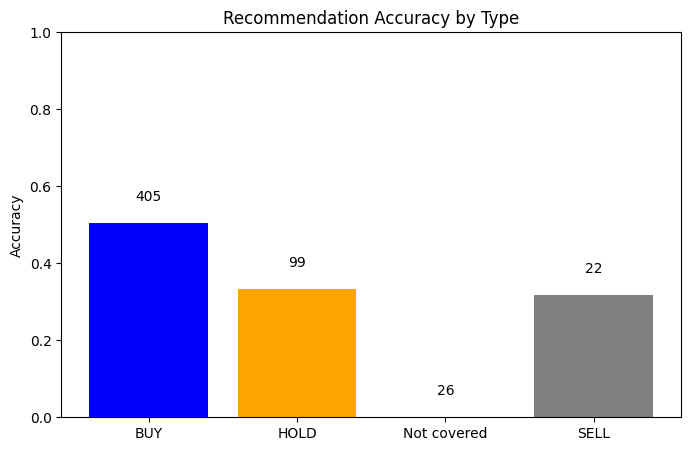

In [24]:
    # Bar plot to compare accuracy of recommendation types
    accuracy_labels = accuracy_by_type.index
    accuracy_values = accuracy_by_type.values
    count_values = count_by_type.loc[accuracy_labels].values # Align counts with accuracy labels

    plt.figure(figsize=(8,5))
    bars = plt.bar(accuracy_labels, accuracy_values, color=['blue', 'orange', 'green', 'gray']) # Added colors for all types
    plt.ylabel('Accuracy')
    plt.title('Recommendation Accuracy by Type')
    plt.ylim(0, 1)

        # Show counts on the bars
    for bar, count in zip(bars, count_values):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, str(count), ha='center', va='bottom')

    plt.show()

In [26]:
# Calculate the average price change for each recommendation level
average_price_change_by_recommendation = rec_df.groupby('Recommendation')['price_change'].mean()
print("\nAverage Price Change by Recommendation Level:")
print(average_price_change_by_recommendation)

# Filter out 'Not covered' if you want to focus on active recommendations for plotting
filtered_rec_df = rec_df[rec_df['Recommendation'].isin(['BUY', 'SELL', 'HOLD'])].copy()


Average Price Change by Recommendation Level:
Recommendation
BUY            1.233706
HOLD           0.316936
Not covered   -0.046881
SELL          -0.091232
Name: price_change, dtype: float64


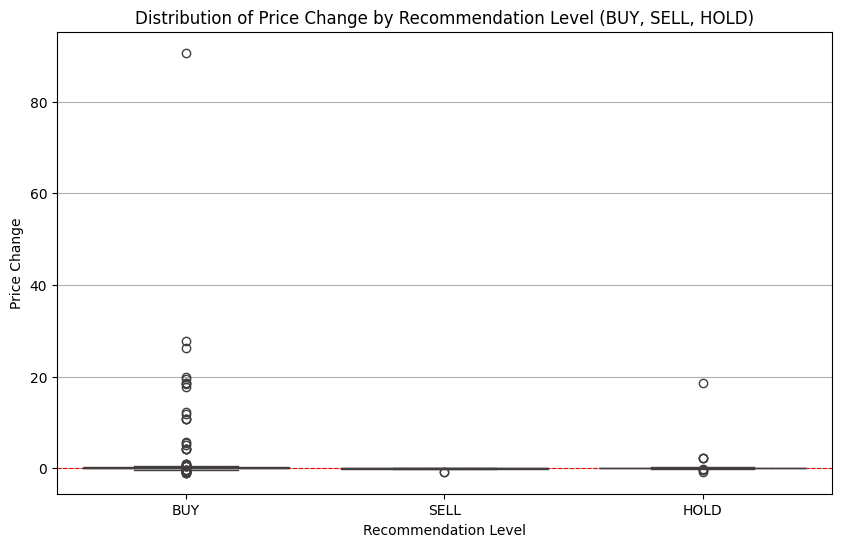

In [28]:
# Create a box plot to visualize the distribution of price changes for different recommendation levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recommendation', y='price_change', data=filtered_rec_df)
plt.title('Distribution of Price Change by Recommendation Level (BUY, SELL, HOLD)')
plt.xlabel('Recommendation Level')
plt.ylabel('Price Change')
plt.grid(axis='y')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Add a line at y=0
plt.show()

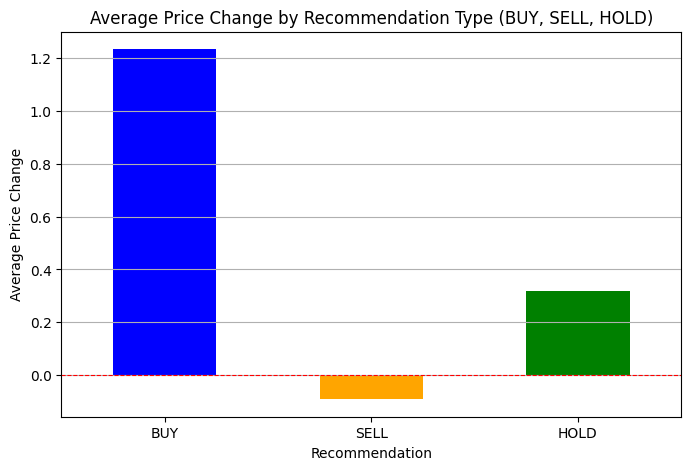

In [29]:
    # Compare the average price change for BUY, SELL, and HOLD
    if not average_price_change_by_recommendation[['BUY', 'SELL', 'HOLD']].empty:
        plt.figure(figsize=(8, 5))
        average_price_change_by_recommendation.loc[['BUY', 'SELL', 'HOLD']].plot(kind='bar', color=['blue', 'orange', 'green'])
        plt.title('Average Price Change by Recommendation Type (BUY, SELL, HOLD)')
        plt.xlabel('Recommendation')
        plt.ylabel('Average Price Change')
        plt.xticks(rotation=0)
        plt.grid(axis='y')
        plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Add a line at y=0
        plt.show()
    else:
        print("\nNot enough data for BUY, SELL, or HOLD recommendations to plot average price change.")

In [31]:
# --- Performance Analysis Over Time ---
# Ensure 'Open date' and 'price_change' columns are available and correctly formatted in rec_df
rec_df_time = rec_df.dropna(subset=['Open date', 'price_change']).copy()

if not rec_df_time.empty:
    # Set 'Open date' as the index for time series analysis
    rec_df_time.set_index('Open date', inplace=True)

    # Resample the data to a weekly frequency and calculate the mean accuracy and mean price change
    weekly_accuracy = rec_df_time['correct'].resample('W').mean()
    weekly_returns = rec_df_time['price_change'].resample('W').mean()

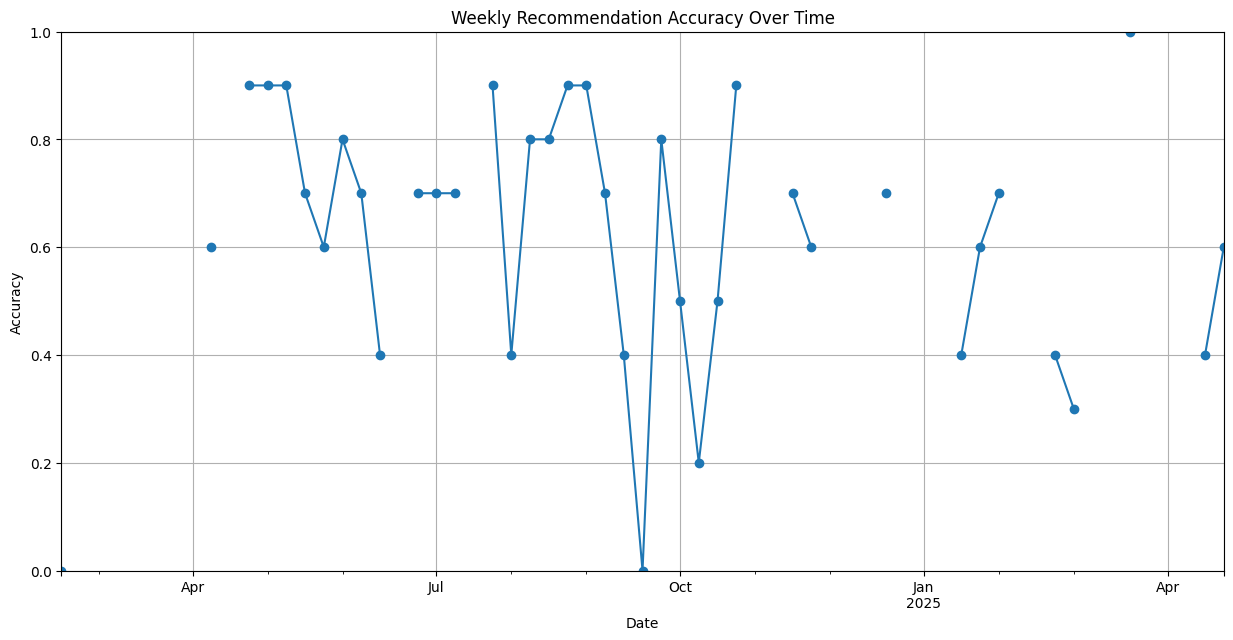

In [33]:
# Plot Weekly Accuracy Over Time
plt.figure(figsize=(15, 7))
weekly_accuracy.plot(marker='o', linestyle='-')
plt.title('Weekly Recommendation Accuracy Over Time')
plt.xlabel('Date')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

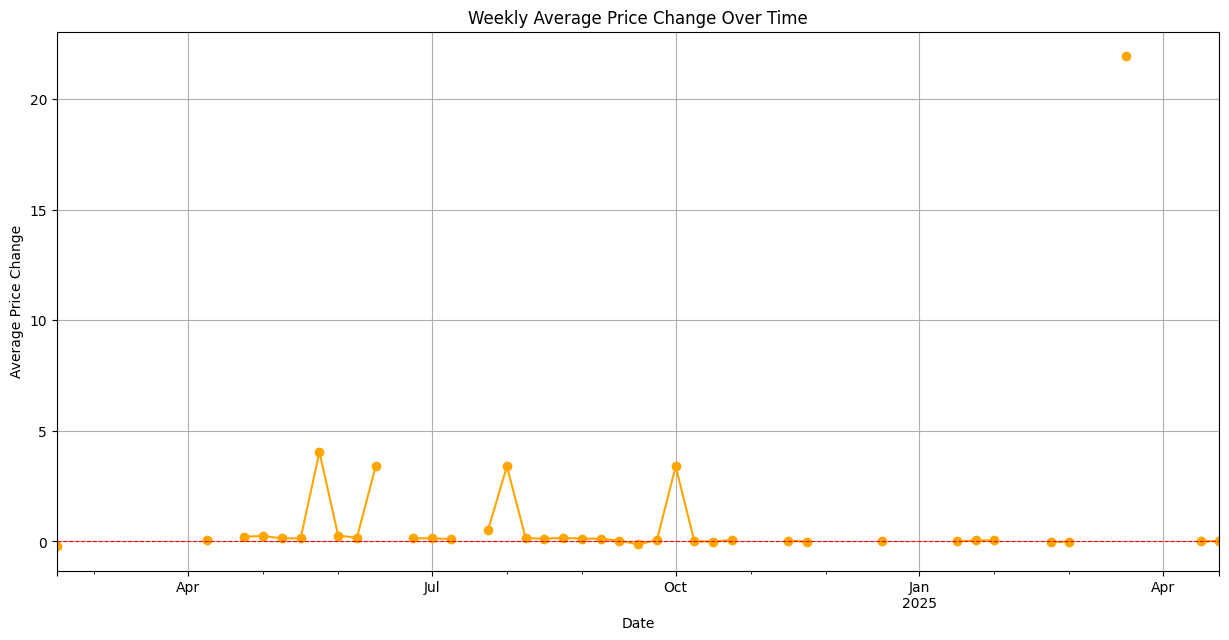

In [34]:
        # Plot Weekly Average Return Over Time
        plt.figure(figsize=(15, 7))
        weekly_returns.plot(marker='o', linestyle='-', color='orange')
        plt.title('Weekly Average Price Change Over Time')
        plt.xlabel('Date')
        plt.ylabel('Average Price Change')
        plt.grid(True)
        plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Add a line at y=0
        plt.show()

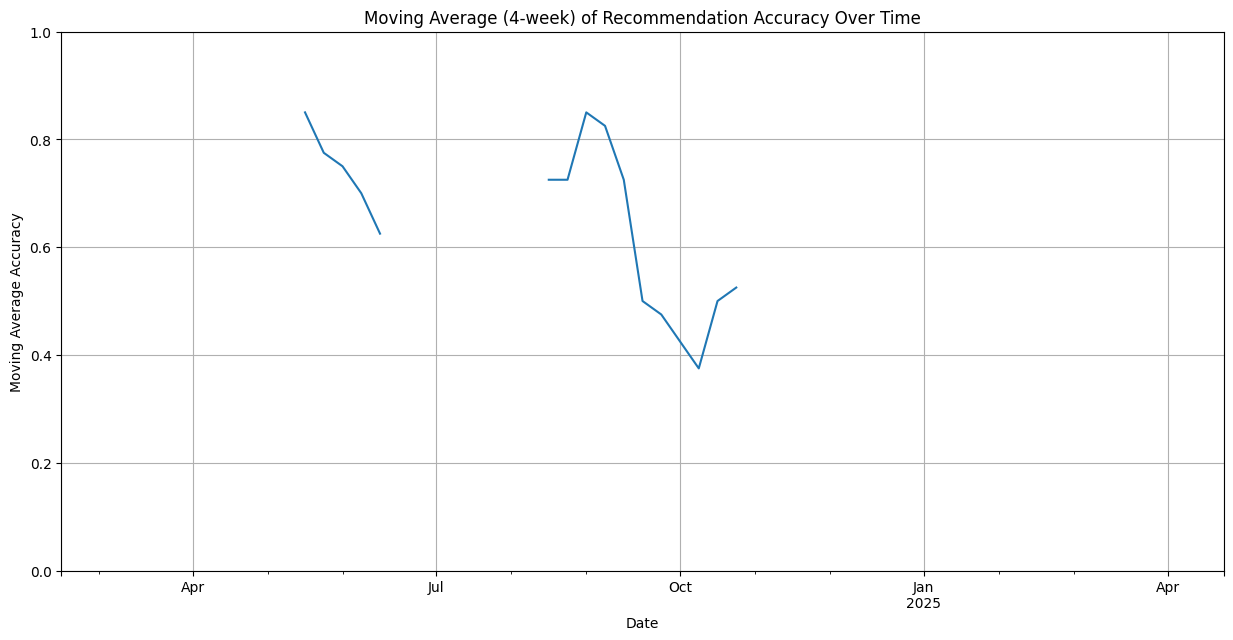

In [36]:
        # Deeper Analysis: Moving Averages
        # Calculate a moving average of accuracy and returns to smooth out fluctuations and see trends
        window_size = 4 # 4 weeks (approximately a month)
        weekly_accuracy_ma = weekly_accuracy.rolling(window=window_size).mean()
        weekly_returns_ma = weekly_returns.rolling(window=window_size).mean()

        # Plot Moving Average of Weekly Accuracy
        plt.figure(figsize=(15, 7))
        weekly_accuracy_ma.plot(linestyle='-')
        plt.title(f'Moving Average ({window_size}-week) of Recommendation Accuracy Over Time')
        plt.xlabel('Date')
        plt.ylabel('Moving Average Accuracy')
        plt.ylim(0, 1)
        plt.grid(True)
        plt.show()

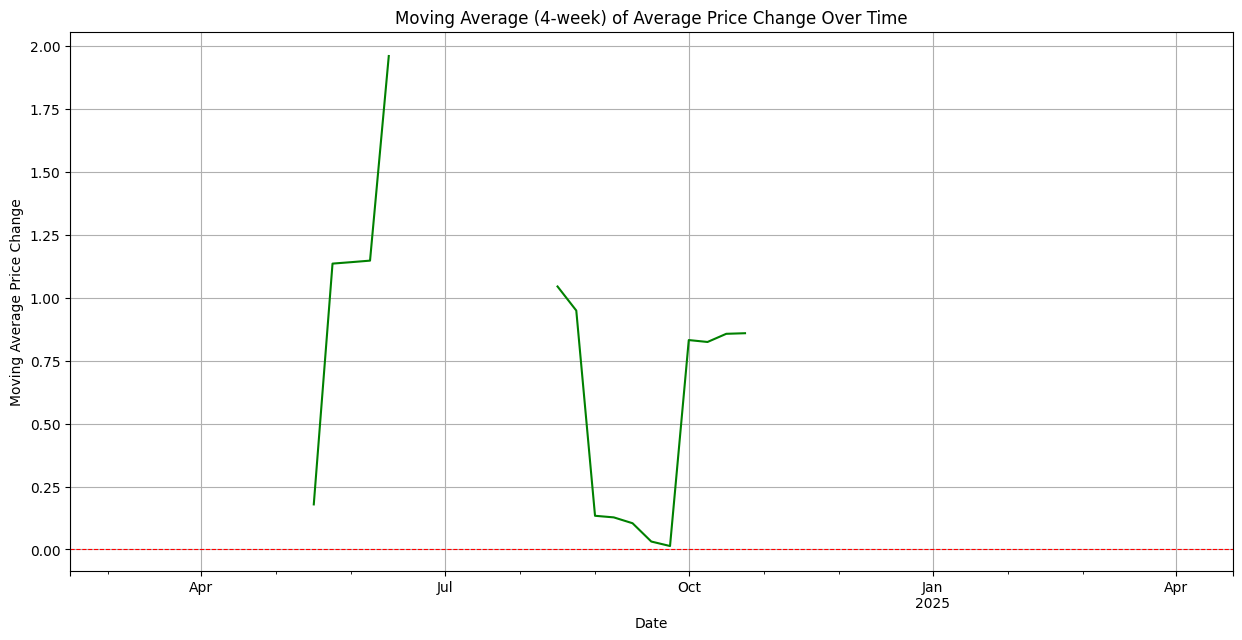

In [37]:
        # Plot Moving Average of Weekly Average Return
        plt.figure(figsize=(15, 7))
        weekly_returns_ma.plot(linestyle='-', color='green')
        plt.title(f'Moving Average ({window_size}-week) of Average Price Change Over Time')
        plt.xlabel('Date')
        plt.ylabel('Moving Average Price Change')
        plt.grid(True)
        plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Add a line at y=0
        plt.show()

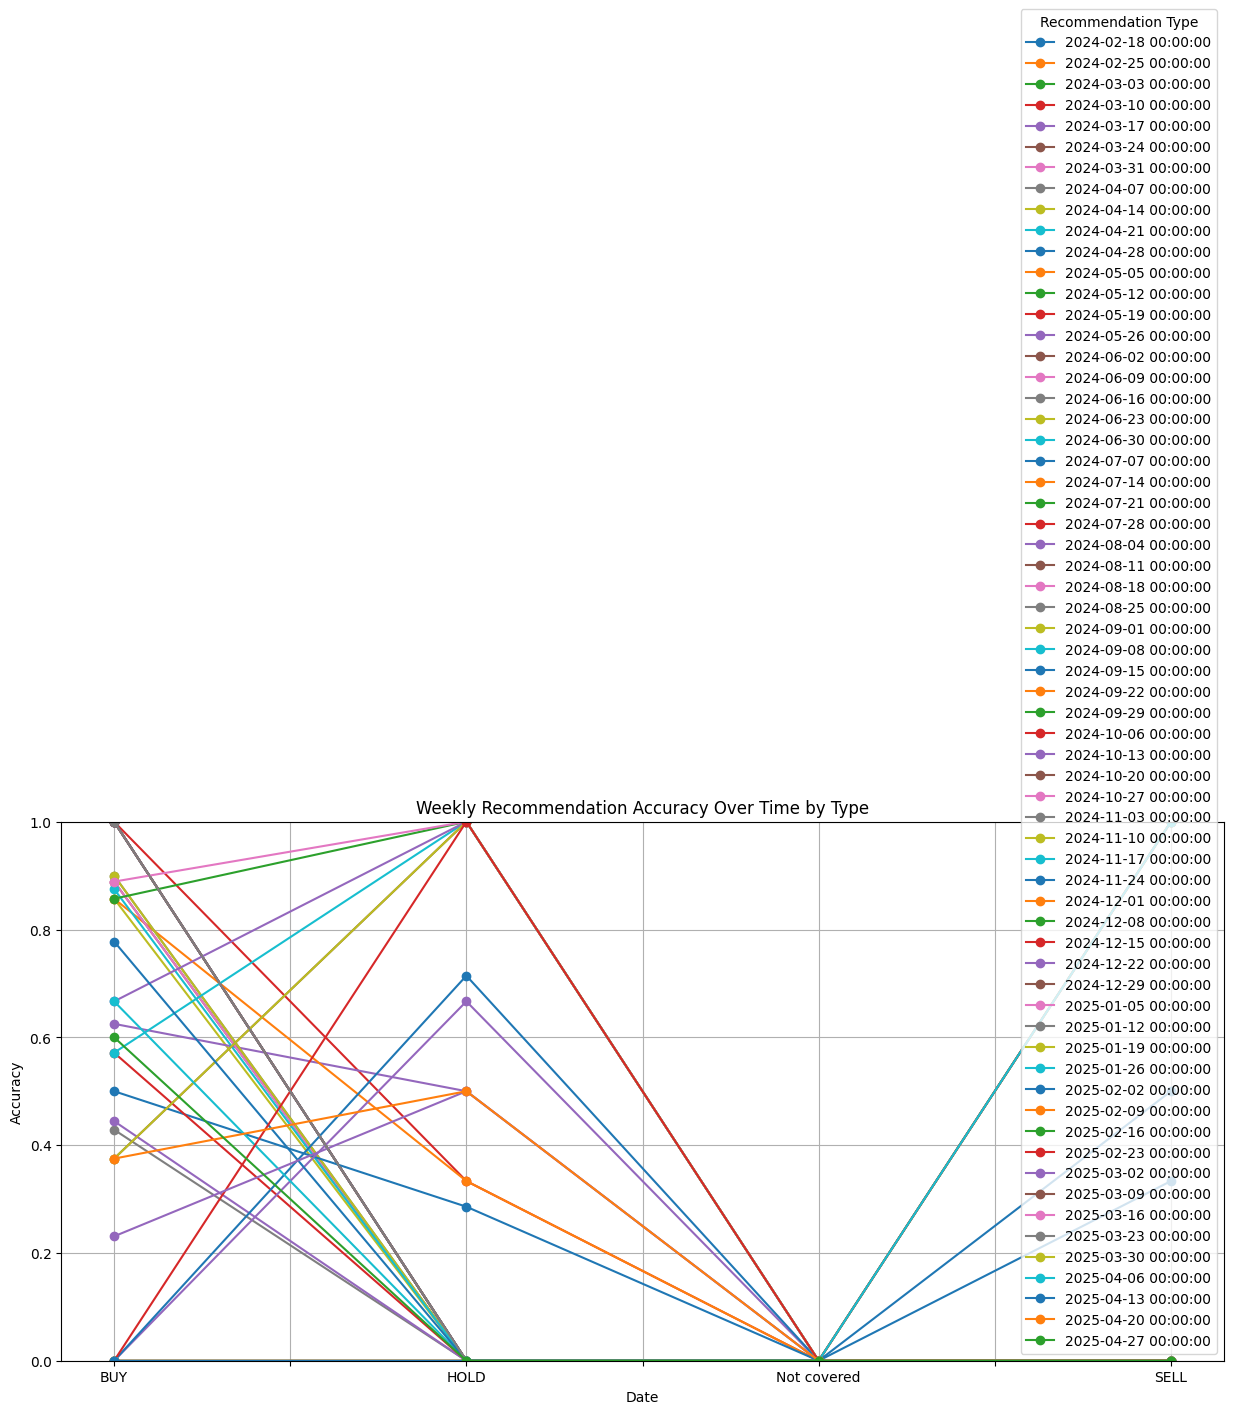

In [38]:
        # Deeper Analysis: Analyze trends for different recommendation types
        # Group by Recommendation and resample
        # Need to handle potential NaNs from unstacking
        weekly_accuracy_by_rec = rec_df_time.groupby('Recommendation')['correct'].resample('W').mean().unstack().fillna(0)
        weekly_returns_by_rec = rec_df_time.groupby('Recommendation')['price_change'].resample('W').mean().unstack() # Keep NaNs for returns plot

        # Plot Weekly Accuracy by Recommendation Type
        plt.figure(figsize=(15, 7))
        weekly_accuracy_by_rec.plot(ax=plt.gca(), marker='o', linestyle='-')
        plt.title('Weekly Recommendation Accuracy Over Time by Type')
        plt.xlabel('Date')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        plt.grid(True)
        plt.legend(title='Recommendation Type')
        plt.show()

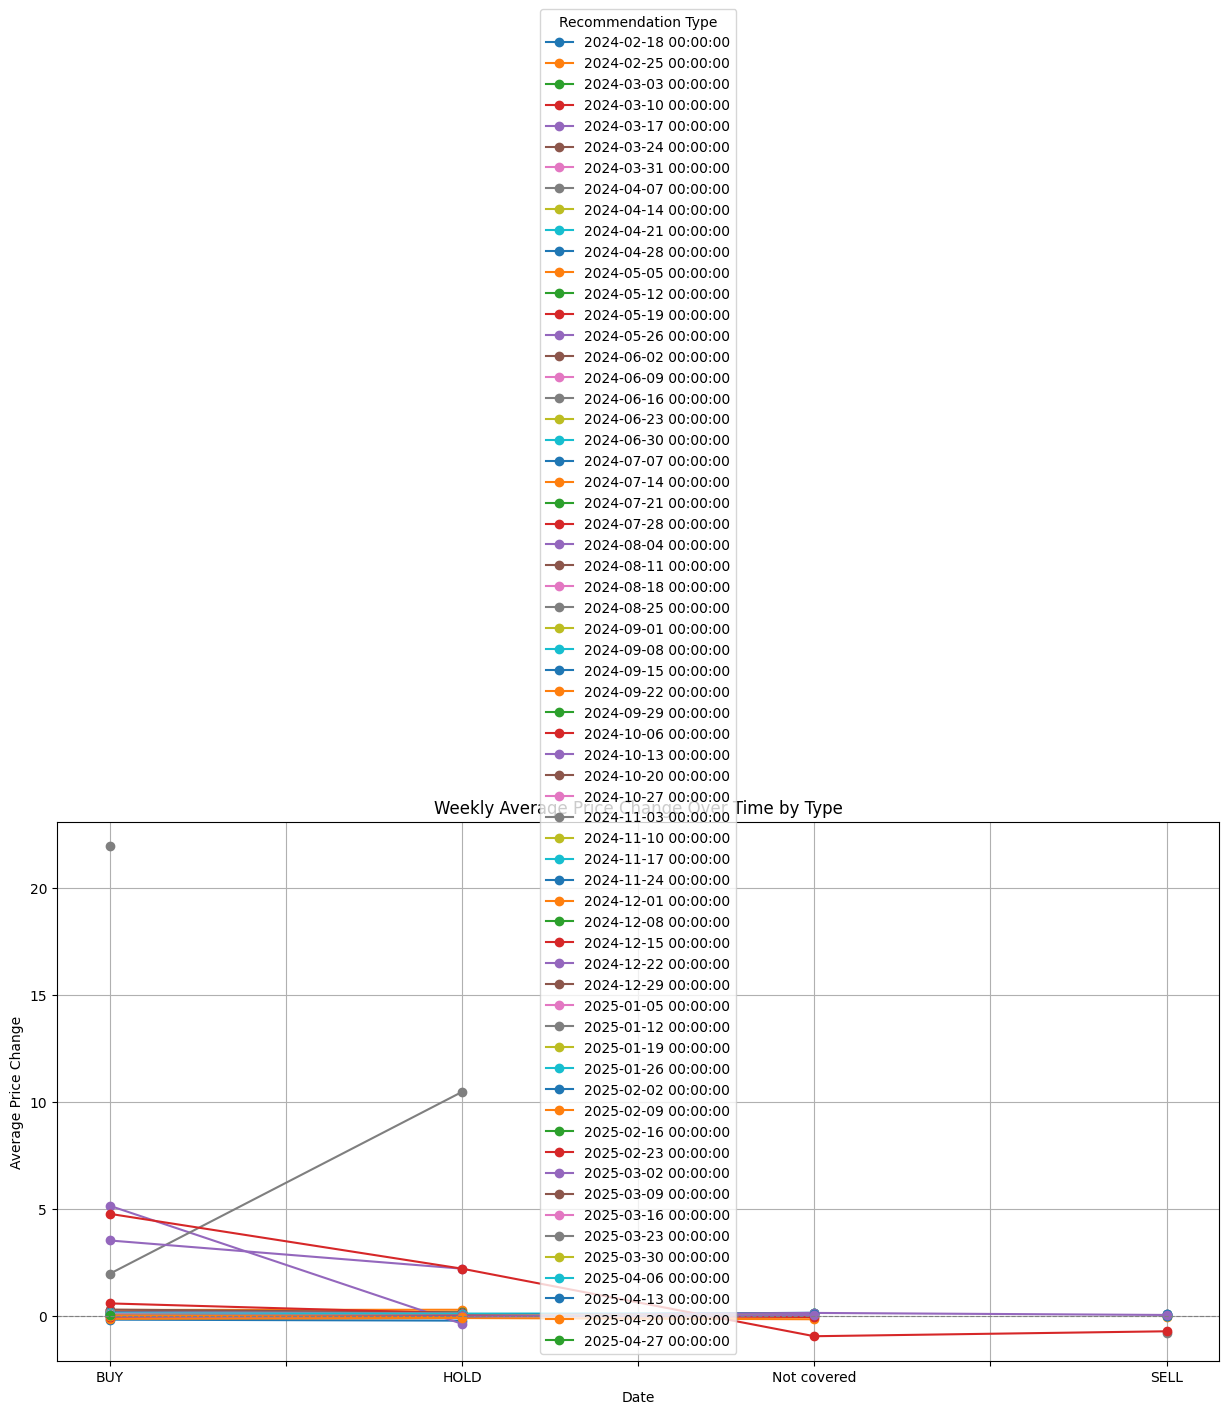

In [47]:
        # Plot Weekly Average Return by Recommendation Type
        plt.figure(figsize=(15, 7))
        weekly_returns_by_rec.plot(ax=plt.gca(), marker='o', linestyle='-')
        plt.title('Weekly Average Price Change Over Time by Type')
        plt.xlabel('Date')
        plt.ylabel('Average Price Change')
        plt.grid(True)
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Add a line at y=0
        plt.legend(title='Recommendation Type')
        plt.show()

In [61]:
    # --- Performance Analysis by Stock ---
    # Group by stock and calculate accuracy and mean price change for all recommendations (not just sequential)
    accuracy_by_stock = rec_df.groupby('Stock')['correct'].mean()

    # Count the number of recommendations for each stock
    recommendation_count_by_stock = rec_df['Stock'].value_counts()

    # Calculate mean price change by stock
    mean_price_change_by_stock = rec_df.groupby('Stock')['price_change'].mean()

    # Combine accuracy, count, and mean price change into a single DataFrame
    stock_performance_summary_all = pd.DataFrame({
        'Accuracy': accuracy_by_stock,
        'Recommendation Count': recommendation_count_by_stock,
        'Mean Price Change': mean_price_change_by_stock
    })

    # Sort by accuracy
    stock_performance_summary_all_sorted_accuracy = stock_performance_summary_all.sort_values(by='Accuracy', ascending=False)

    print("\nOverall Recommendation Accuracy and Performance by Stock:")
    display(stock_performance_summary_all_sorted_accuracy.head())
    display(stock_performance_summary_all_sorted_accuracy.tail())


Overall Recommendation Accuracy and Performance by Stock:


,Accuracy,Recommendation Count,Mean Price Change
Stock,,,
UBA,0.652174,46,0.945992
FIDELITYBANK,0.652174,46,0.709174
STANBIC,0.630435,46,1.159711
GTCO,0.586957,46,2.082163
ACCESSCORP,0.565217,46,0.724112


,Accuracy,Recommendation Count,Mean Price Change
Stock,,,
WEMABANK,0.434783,46,0.434374
ETI,0.413043,46,0.205983
JAIZBANK,0.391304,46,2.227617
FBNH,0.000000,46,NaN
STERLINGBANK,0.000000,46,NaN


In [65]:
# --- Summary of Findings ---
print("\n--- Summary of Findings ---")
print("Key Observations and Insights:")
print("--------------------------------------------------------------------------")

# 1. Overall Recommendation Performance
print("\nOverall Recommendation Performance:")
print(f"- Total recommendations analyzed (with valid price data): {rec_df['price_change'].count()}")
print(f"- Overall Accuracy (Correct Recommendations): {accuracy:.3f}")
print(f"- Average Price Change per Recommendation: {rec_df['price_change'].mean():.3f}")


# 2. Performance by Recommendation Type
print("\nPerformance by Recommendation Type:")
print(f"- 'BUY' recommendations accuracy: {accuracy_by_type.get('BUY', 0):.3f}")
print(f"- 'HOLD' recommendations accuracy (within +/- {hold_threshold*100}% price change): {accuracy_by_type.get('HOLD', 0):.3f}")
print(f"- 'SELL' recommendations accuracy: {accuracy_by_type.get('SELL', 0):.3f}")
print(f"- 'Not covered' recommendations accuracy: {accuracy_by_type.get('Not covered', 0):.3f}")

print("\nAverage Price Change by Recommendation Type:")
print(f"- 'BUY' average price change: {average_price_change_by_recommendation.get('BUY', 0):.3f}")
print(f"- 'HOLD' average price change: {average_price_change_by_recommendation.get('HOLD', 0):.3f}")
print(f"- 'SELL' average price change: {average_price_change_by_recommendation.get('SELL', 0):.3f}")


--- Summary of Findings ---
Key Observations and Insights:
--------------------------------------------------------------------------

Overall Recommendation Performance:
- Total recommendations analyzed (with valid price data): 400
- Overall Accuracy (Correct Recommendations): 0.442
- Average Price Change per Recommendation: 0.969


In [68]:
# 2. Performance by Recommendation Type
print("\nPerformance by Recommendation Type:")
print(f"- 'BUY' recommendations accuracy: {accuracy_by_type.get('BUY', 0):.3f}")
print(f"- 'HOLD' recommendations accuracy (within +/- {hold_threshold*100}% price change): {accuracy_by_type.get('HOLD', 0):.3f}")
print(f"- 'SELL' recommendations accuracy: {accuracy_by_type.get('SELL', 0):.3f}")
print(f"- 'Not covered' recommendations accuracy: {accuracy_by_type.get('Not covered', 0):.3f}")

print("\nAverage Price Change by Recommendation Type:")
print(f"- 'BUY' average price change: {average_price_change_by_recommendation.get('BUY', 0):.3f}")
print(f"- 'HOLD' average price change: {average_price_change_by_recommendation.get('HOLD', 0):.3f}")
print(f"- 'SELL' average price change: {average_price_change_by_recommendation.get('SELL', 0):.3f}")


# 3. Performance by Stock (Top/Bottom Performers)
print("\nPerformance by Stock:")
print("Top 5 Stocks by Accuracy:")
display(stock_performance_summary_all_sorted_accuracy.head())

print("\nBottom 5 Stocks by Accuracy:")
display(stock_performance_summary_all_sorted_accuracy.tail())

print("\nStock with Highest Average Price Change:")
# Filter out stocks with NaN mean price change before finding the max
stock_with_max_price_change = stock_performance_summary_all['Mean Price Change'].dropna().idxmax()
max_price_change_value = stock_performance_summary_all['Mean Price Change'].max()
print(f"- {stock_with_max_price_change}: {max_price_change_value:.3f}")

print("\nStock with Lowest Average Price Change (excluding NaNs):")
# Filter out stocks with NaN mean price change before finding the min
stock_with_min_price_change = stock_performance_summary_all['Mean Price Change'].dropna().idxmin()
min_price_change_value = stock_performance_summary_all['Mean Price Change'].min()
print(f"- {stock_with_min_price_change}: {min_price_change_value:.3f}")


Performance by Recommendation Type:
- 'BUY' recommendations accuracy: 0.504
- 'HOLD' recommendations accuracy (within +/- 5.0% price change): 0.333
- 'SELL' recommendations accuracy: 0.318
- 'Not covered' recommendations accuracy: 0.000

Average Price Change by Recommendation Type:
- 'BUY' average price change: 1.234
- 'HOLD' average price change: 0.317
- 'SELL' average price change: -0.091

Performance by Stock:
Top 5 Stocks by Accuracy:


,Accuracy,Recommendation Count,Mean Price Change
Stock,,,
UBA,0.652174,46,0.945992
FIDELITYBANK,0.652174,46,0.709174
STANBIC,0.630435,46,1.159711
GTCO,0.586957,46,2.082163
ACCESSCORP,0.565217,46,0.724112



Bottom 5 Stocks by Accuracy:


,Accuracy,Recommendation Count,Mean Price Change
Stock,,,
WEMABANK,0.434783,46,0.434374
ETI,0.413043,46,0.205983
JAIZBANK,0.391304,46,2.227617
FBNH,0.000000,46,NaN
STERLINGBANK,0.000000,46,NaN



Stock with Highest Average Price Change:
- JAIZBANK: 2.228

Stock with Lowest Average Price Change (excluding NaNs):
- ETI: 0.206


Conclusion:

This analysis provides insights into the performance of the stock recommendations. While the overall accuracy is around {{accuracy:.1%}}, there is significant variation in performance across different recommendation types and individual stocks. 'BUY' recommendations, on average, were associated with positive price changes and had the highest accuracy among the active recommendations. Further investigation into the factors contributing to the performance differences among stocks and over time could yield valuable insights for future recommendation strategies.